In [1]:
%matplotlib inline
import pandas as pd
import os 
from process_util import agg_gender, double_axis
import re
import matplotlib.pyplot as plt
import numpy as np


dat = pd.read_csv('../data/good_bundle_bracket.txt',sep='\t',header=None,
                  names=['app_id','filename','cnt','f','m','f18','f25','f35',
                         'f45','f55','f65','m18','m25','m35','m45','m55','m65'])
coverage = pd.read_csv('../data/good_bundle_bracket_cnt.csv',header=None, 
                       names=['bundle','age_bracket','cnt'],dtype={'age_bracket':'str'})
dat.drop('app_id',axis=1,inplace=True)

In [2]:
cnt, keyw = [], ['_18$','_25$','_35$','_45$','_55$','_65$']
for k in keyw:
    cnt.append(sum(dat.loc[dat.filename.str.contains(k)].cnt))
cntc = dat.iloc[:,0:2]

# Accuracy for different brackets

In [3]:
datag = agg_gender(dat,with_cnt=True)
datag['acc'], datag['lab'], datag['bundle'] = np.nan, np.nan, datag['filename'].str[6:-3]
for k in keyw:
    datag.loc[datag.filename.str.contains(k),'lab']=k[1:3]
    datag.loc[datag.filename.str.contains(k),'acc']=datag.loc[datag.filename.str.contains(k)][k[1:3]]

/Users/weiqing.yu@groundtruth.com/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


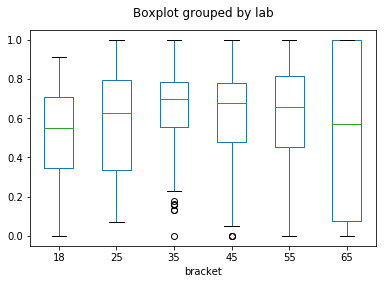

In [4]:
dat1 = pd.merge(datag, coverage, left_on=['bundle','lab'],right_on=['bundle','age_bracket'])
datag.loc[:,['lab','acc']].boxplot(by='lab',grid=False)
plt.title('')
plt.xlabel('bracket')
plt.show()

Above is a boxplot for accuracy for different brackets. In general the average accuracy is OK. Then we will check the distribution of accuracy for different brackets more carefully.

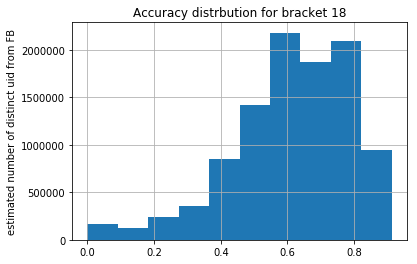

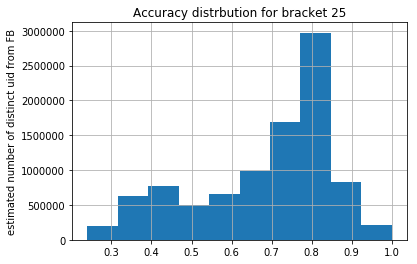

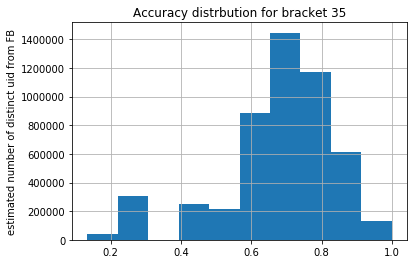

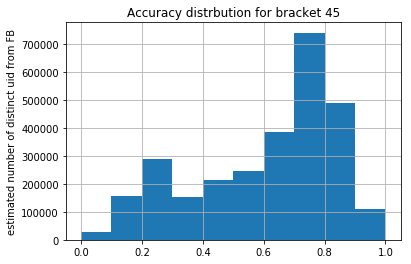

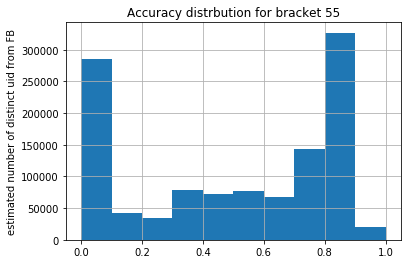

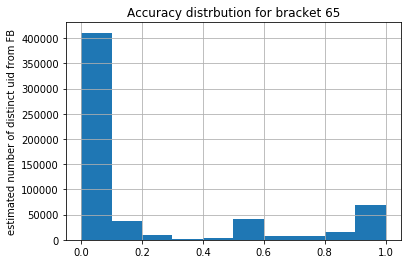

In [5]:
for k in keyw:
    dat1.loc[dat1.lab==k[1:3],'acc'].hist(weights = dat1.loc[dat1.lab==k[1:3],'cnt_x'])
    plt.title('Accuracy distrbution for bracket {}'.format(k[1:3]))
    plt.ylabel('estimated number of distinct uid from FB')
    plt.show()

In the plots above, the y axis represents the number of estimated distinct uids that have the corresponding accuracy. This number is computed by summing up the number of FB matched uids within each bundle that has the corresponding accuracy. Those numbers are smaller than our coverage since there are some uids that are not matched by FB. Next, we will give the plots for coverage vs. accuracy for different brackets, where the coverage is number of distinct uids we have instead of FB matched uid.

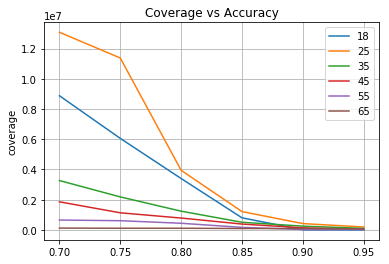

In [6]:
for k in keyw:
    dat2 = dat1.loc[dat1.lab==k[1:3],['acc','cnt_y']]
    accum = []
    for i in [x*1.0/100 for x in range(70,100,5)]:
        accum.append(dat2.loc[dat2.acc>i,'cnt_y'].sum())
    plt.plot([x*1.0/100 for x in range(70,100,5)],accum,label=k[1:3])
    plt.title('Coverage vs Accuracy')
    plt.ylabel('coverage')
    plt.legend()
plt.grid()
plt.show()

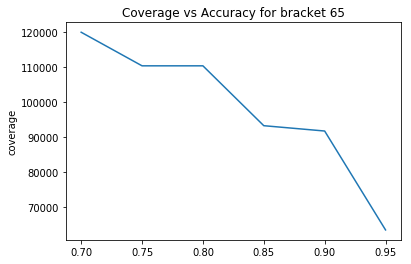

In [7]:
plt.plot([x*1.0/100 for x in range(70,100,5)],accum,label=k[1:3])
plt.title('Coverage vs Accuracy for bracket {}'.format(k[1:3]))
plt.ylabel('coverage')
plt.show()

# Distribution of Brackets
Below we will show the comparison of coverage for different brackets at different accuracy level.

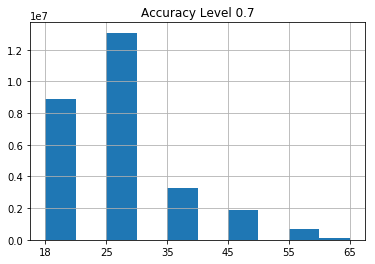

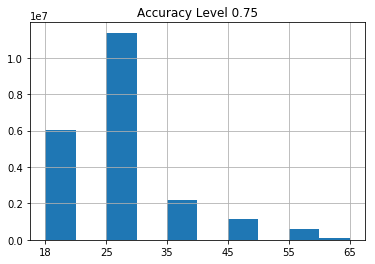

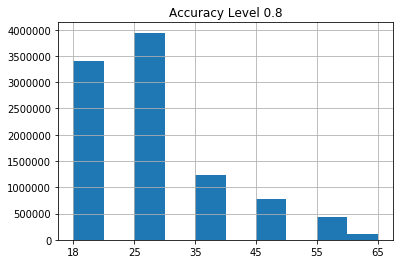

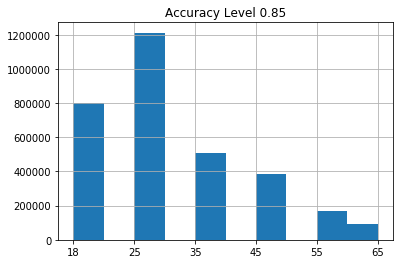

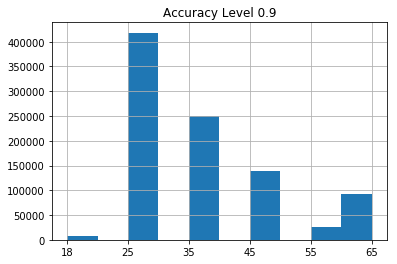

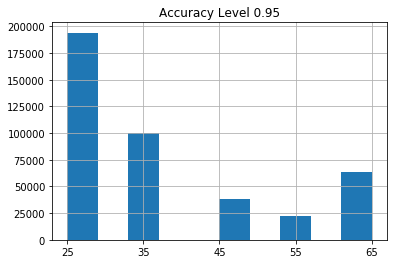

In [8]:
for i in [x*1.0/100 for x in range(70,100,5)]:
    dat2 = dat1.loc[dat1.acc>i,['lab','cnt_y']]
    dat2.lab.hist(weights = dat2.cnt_y)
    plt.title('Accuracy Level {}'.format(i))
    plt.show()

## Overall Demography for different brackets

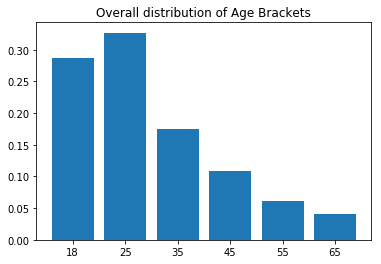

In [9]:
overall = [0.28712, 0.326785, 0.174475, 0.10839499999999999, 0.06184, 0.04088]
plt.bar(['18','25','35','45','55','65'],overall)
plt.title('Overall distribution of Age Brackets')
plt.show()

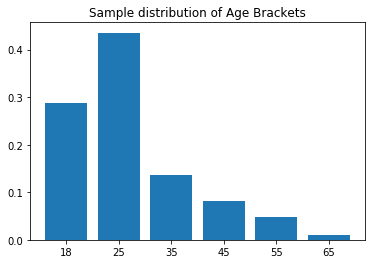

In [10]:
acc_uids = [2537198,3846746,1212695,724622,424329,88251]
acc_uids = [x*1.0/sum(acc_uids) for x in acc_uids]
plt.bar(['18','25','35','45','55','65'], acc_uids)
plt.title('Sample distribution of Age Brackets')
plt.show()

# New Bundle Based Prediction Coverage vs Accuracy

In [11]:
bb_acc = pd.read_csv('../data/label_accuracy.txt',sep='\t',header=None,
                  names=['app_id','filename','cnt','f','m','f18','f25','f35',
                         'f45','f55','f65','m18','m25','m35','m45','m55','m65'])
bb_acc.sort_values('filename',inplace=True)
bb_acc.index=range(bb_acc.shape[0])
bb_acc=agg_gender(bb_acc)
bb_acc.head()

,filename,18,25,35,45,55,65
0,a_final_accurate_uids_66_171231_18,0.72880,0.17980,0.04760,0.02600,0.00980,0.00820
1,a_final_accurate_uids_66_171231_25,0.08288,0.75538,0.10671,0.03059,0.01230,0.01157
2,a_final_accurate_uids_66_171231_35,0.03562,0.07436,0.74582,0.10820,0.02284,0.01258
3,a_final_accurate_uids_66_171231_45,0.02903,0.04100,0.04659,0.79073,0.07566,0.01742
4,a_final_accurate_uids_66_171231_55,0.03244,0.03244,0.03244,0.03244,0.78676,0.08200


In [12]:
bb_acc['acc']=np.nan
for k in keyw:
    bb_acc.loc[bb_acc.filename.str.contains(k),'acc']=bb_acc.loc[bb_acc.filename.str.contains(k)][k[1:3]]
bb_acc.head()

,filename,18,25,35,45,55,65,acc
0,a_final_accurate_uids_66_171231_18,0.72880,0.17980,0.04760,0.02600,0.00980,0.00820,0.72880
1,a_final_accurate_uids_66_171231_25,0.08288,0.75538,0.10671,0.03059,0.01230,0.01157,0.75538
2,a_final_accurate_uids_66_171231_35,0.03562,0.07436,0.74582,0.10820,0.02284,0.01258,0.74582
3,a_final_accurate_uids_66_171231_45,0.02903,0.04100,0.04659,0.79073,0.07566,0.01742,0.79073
4,a_final_accurate_uids_66_171231_55,0.03244,0.03244,0.03244,0.03244,0.78676,0.08200,0.78676


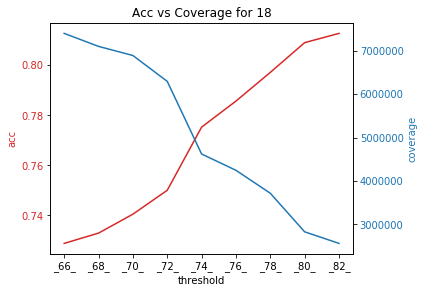

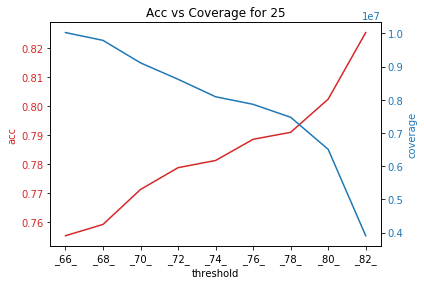

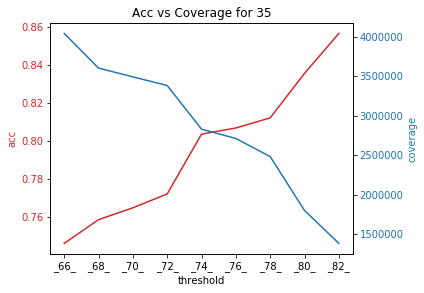

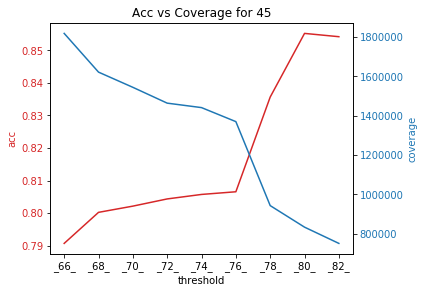

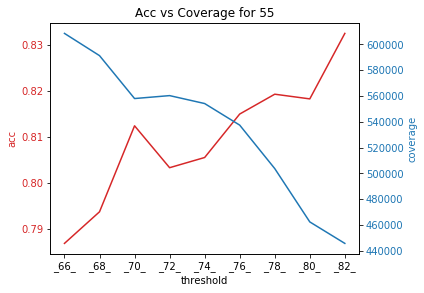

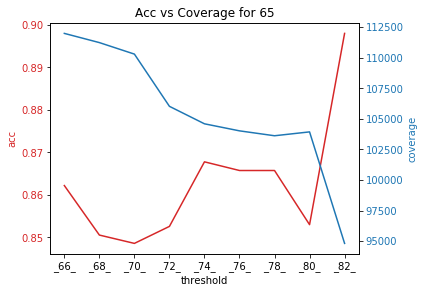

In [19]:
thresholds=['_66_','_68_','_70_','_72_','_74_','_76_','_78_','_80_','_82_']
coverage=pd.DataFrame([[7400535,10024615,4039787,1818773,608464,111987],
          [7101355,9789310,3600685,1621736,591227,111235],
          [6891082,9111332,3490070,1544431,557967,110294],
          [6295718,8617403,3380931,1463925,560242,106024],
          [4621507,8090848,2828293,1441198,554094,104596],
          [4246146,7862731,2710359,1369913,537371,104020],
          [3717681,7472669,2481411,942576,503688,103619],
          [2828728,6506684,1799494,832951,462337,103935],
          [2561840,3904934,1383305,750320,445686,94819]],
                     columns=['18','25','35','45','55','65'])
coverage1=[24000000,22815000,21705000,20424000,17640000,16830000,15221000,12534000,9140000]
for k in keyw:
    double_axis(thresholds,bb_acc.loc[bb_acc.filename.str.contains(k),'acc'],coverage[k[1:3]],'Acc vs Coverage for {}'.format(str(k[1:3])),'acc','coverage')